In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Datasets

In [2]:
data_train = pd.read_csv(r'G:\DATASETS\Analytics Vidya\HR\train.csv')
data_train.drop(['enrollee_id'],axis=1,inplace=True)
data_train.head(3)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0


In [3]:
data_test = pd.read_csv(r'G:\DATASETS\Analytics Vidya\HR\test.csv')
ID = data_test['enrollee_id']
data_test.drop(['enrollee_id'],axis=1,inplace=True)
data_test.sample(3)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
1182,city_16,0.910,NaN,No relevent experience,Full time course,Graduate,STEM,1,NaN,NaN,1,6
9705,city_114,0.926,Male,Has relevent experience,no_enrollment,Masters,STEM,12,100-500,NaN,never,14
903,city_136,0.897,Male,No relevent experience,Full time course,High School,NaN,4,NaN,NaN,never,7


In [4]:
category_columns = ['city','gender','relevent_experience','enrolled_university',
                    'education_level','major_discipline','company_type']
numerics_columns = [column for column in data_train.columns if column not in category_columns]

In [5]:
data_train[numerics_columns].head()

,city_development_index,experience,company_size,last_new_job,training_hours,target
0,0.689,3,100-500,1,106,0
1,0.923,14,<10,1,69,0
2,0.910,6,50-99,2,4,0
3,0.666,14,50-99,1,26,0
4,0.887,8,NaN,2,88,1


In [6]:
data_train[category_columns].head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type
0,city_149,Male,Has relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd
1,city_83,Male,Has relevent experience,no_enrollment,Graduate,STEM,Funded Startup
2,city_16,NaN,Has relevent experience,no_enrollment,Graduate,STEM,Public Sector
3,city_64,Male,Has relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd
4,city_100,NaN,No relevent experience,no_enrollment,Masters,STEM,NaN


### Training Data clean

In [7]:
### Fill nan values with mode values for all the colums
for col in data_train.columns:
    data_train[col].fillna(data_train[col].mode().values[0],inplace=True)

In [8]:
## check any nan values in the columns
data_train.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [9]:
## unique last_new_job values
data_train['last_new_job'].unique()

array(['1', '2', '3', '>4', 'never', '4'], dtype=object)

In [10]:
## Convert the last_new_job object or string values into a integer values
last_new_job_map = {}
last_job = data_train['last_new_job'].unique()
for i in range(len(last_job)):
    try:
        last_new_job_map[last_job[i]]=int(last_job[i])
    except ValueError:
        try:
            last_new_job_map[last_job[i]]=last_job[i].split('>')[1]
        except IndexError:
            last_new_job_map[last_job[i]]=0

data_train['last_new_job'] = data_train['last_new_job'].map(last_new_job_map)

In [11]:
## converting the hours of training into days of traing
data_train['training_hours_days'] = data_train['training_hours'].apply(lambda x :int(x/24))
data_train.drop(['training_hours'],axis=1,inplace=True)

In [12]:
## cchecking unique values in company_size
s= data_train['company_size'].unique()
s

array(['100-500', '<10', '50-99', '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49'], dtype=object)

In [13]:
## Convert the company_size coulumn object values into a categorical values
company_size_map ={s[0]:100,s[1]:1,s[2]:50,s[3]:5000,s[4]:100000,s[5]:1000,s[6]:500,s[7]:10}
data_train['company_size'] = data_train['company_size'].map(company_size_map)
def company_size(data):
    if data <=10:
        return 'very_low'
    elif data>10 and data<=100:
        return 'low'
    elif data >100 and data <=1000:
        return 'mid'
    elif data >1000 and data <=5000:
        return 'just_mid'
    elif data >5000 and data <=10000:
        return 'large'
    elif data>10000:
        return 'MNC'
data_train['company_size'] = data_train['company_size'].apply(lambda x :company_size(x))

In [14]:
data_train.experience.unique()  ## unique values in experience

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', '20'],
      dtype=object)

In [15]:
#Converting Object dtype to integer dtype
experience_map = {}
exp = data_train.experience.unique()
for i in range(len(exp)):
    try:
        experience_map[exp[i]]=int(exp[i])

    except ValueError:
        experience_map[exp[i]]=int(exp[4].split('>')[1])
data_train['experience'] = data_train['experience'].map(experience_map)

In [16]:
## Classifying experience column
def experience(data):
    if data <4:
        return 0
    elif data>=4 and data<10:
        return 1
    elif data >=10 and data <20:
        return 2
    elif data >=20:
        return 3
data_train['experience'] = data_train['experience'].apply(lambda x:experience(x))     

In [17]:
data_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target,training_hours_days
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,low,Pvt Ltd,1,0,4
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,very_low,Funded Startup,1,0,2
2,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,low,Public Sector,2,0,0
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,low,Pvt Ltd,1,0,1
4,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,1,low,Pvt Ltd,2,1,3


In [18]:
data_train.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
target                    0
training_hours_days       0
dtype: int64

In [19]:
y = data_train['target']
train = data_train.drop(['target'],axis=1)

In [20]:
category_columns.append('company_size')
category_columns

['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'company_type',
 'company_size']

In [21]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#### Type1: Imbalanced data

In [24]:
X = pd.get_dummies(train,columns=category_columns)
X_train_i,X_test_i,y_train_i ,y_test_i = train_test_split(X,y,test_size=0.25)

In [26]:
RFC = RandomForestClassifier()
RFC.fit(X_train_i,y_train_i)
roc_auc_score(y_test_i,RFC.predict(X_test_i))

0.5118504553814834

In [27]:
BC = BaggingClassifier()
BC.fit(X_train_i,y_train_i)
roc_auc_score(y_test_i,BC.predict(X_test_i))

0.5170629226675302

In [29]:
X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.25,stratify=y)  

In [30]:
BC = BaggingClassifier()
BC.fit(X_train,y_train)
roc_auc_score(y_test,BC.predict(X_test))

0.506792019563402

In [31]:
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)
roc_auc_score(y_test,RFC.predict(X_test))

0.5090299316076186

### Type2 : Balance Data

In [32]:
data_train.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target,training_hours_days
0,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,0,low,Pvt Ltd,1,0,4
1,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,very_low,Funded Startup,1,0,2
2,city_16,0.910,Male,Has relevent experience,no_enrollment,Graduate,STEM,1,low,Public Sector,2,0,0
3,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,2,low,Pvt Ltd,1,0,1
4,city_100,0.887,Male,No relevent experience,no_enrollment,Masters,STEM,1,low,Pvt Ltd,2,1,3


In [33]:
data_dummies = pd.get_dummies(data_train,columns=category_columns)

data_0 = data_dummies[data_dummies['target']==0]
data_1 = data_dummies[data_dummies['target']==1]

In [34]:
equal_data = data_1.append(data_0[:len(data_1)])
equal_data.target.value_counts()

1    2425
0    2425
Name: target, dtype: int64

In [35]:
y = equal_data['target']
X = equal_data.drop(['target'],axis=1)

In [36]:
X_train_e,X_test_e,y_train_e ,y_test_e = train_test_split(X,y,test_size=0.25,stratify=y)

In [37]:
RFC_E = RandomForestClassifier()
RFC_E.fit(X_train_e,y_train_e)
roc_auc_score(y_test_e,RFC_E.predict(X_test_e))

0.551500372442516

In [38]:
SVC_E = SVC()
SVC_E.fit(X_train_e,y_train_e)
roc_auc_score(y_test_e,SVC_E.predict(X_test_e))

0.5753312563546306

In [39]:
MNB_E = MultinomialNB()
MNB_E.fit(X_train_e,y_train_e)
roc_auc_score(y_test_e,MNB_E.predict(X_test_e))

0.5827923401895378

In [42]:
from statistics import mode

In [53]:
pred1 ,pred2,pred3 = RFC_E.predict(X_test_e),SVC_E.predict(X_test_e),MNB_E.predict(X_test_e)

In [54]:
new_pred= []
for i,k,j in zip(pred1,pred2,pred3):
    new_pred.append(mode([i,j,k]))

In [55]:
roc_auc_score(y_test_e,new_pred)

0.5827651546044226

### Type3 : Data scaling

In [56]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scale_s = StandardScaler()
X_std = scale_s.fit_transform(X)
X_train_s,X_test_s,y_train_s ,y_test_s = train_test_split(X_std,y,test_size=0.25,stratify=y)

In [57]:
RFC_S = RandomForestClassifier()
RFC_S.fit(X_train_s,y_train_s)
roc_auc_score(y_test_s,RFC_S.predict(X_test_s))

0.5803986494201314

In [58]:
SVC_S = SVC()
SVC_S.fit(X_train_s,y_train_s)
roc_auc_score(y_test_s,SVC_S.predict(X_test_s))

0.5936638556771657

In [59]:
pred_SVC_S = SVC_S.predict(X_test_s)

In [60]:
scale_m = MinMaxScaler()
X_minmax = scale_m.fit_transform(X)
X_train_m,X_test_m,y_train_m ,y_test_m = train_test_split(X_minmax,y,test_size=0.25,stratify=y)

In [61]:
RFC_M = RandomForestClassifier()
RFC_M.fit(X_train_m,y_train_m)
roc_auc_score(y_test_m,RFC_M.predict(X_test_m))

0.5779261204538905

In [62]:
pred_RFC_M = RFC_M.predict(X_test_m)

In [63]:
BC_M = BaggingClassifier()
BC_M.fit(X_train_m,y_train_m)
roc_auc_score(y_test_m,BC_M.predict(X_test_m))

0.5730123259442913

In [64]:
pred_BC_M = BC_M.predict(X_test_m)

In [65]:
SVC_M = SVC()
SVC_M.fit(X_train_m,y_train_m)
roc_auc_score(y_test_m,SVC_M.predict(X_test_m))

0.5928020726290092

In [66]:
pred_SVC_M = SVC_M.predict(X_test_m)

In [67]:
MNB_M = MultinomialNB()
MNB_M.fit(X_train_m,y_train_m)
roc_auc_score(y_test_m,MNB_M.predict(X_test_m))

0.6026826735391826

In [68]:
pred_MNB_M = MNB_M.predict(X_test_m)

In [69]:
KNN_M = KNeighborsClassifier()
KNN_M.fit(X_train_m,y_train_m)
roc_auc_score(y_test_m,KNN_M.predict(X_test_m))

0.5754277651817901

In [70]:
pred_KNN_M = KNN_M.predict(X_test_m)

In [71]:
pred_m = []
for i,j,k in zip(pred_RFC_M,pred_SVC_M,pred_MNB_M):
    pred_m.append(mode([i,j,k]))

In [72]:
roc_auc_score(y_test_m,pred_m)

0.5977403341652122

### working with Test Data 

In [73]:
## SAME as training data
for col in data_test.columns:
    data_test[col].fillna(data_test[col].mode().values[0],inplace=True)

In [74]:
data_test['last_new_job'] = data_test['last_new_job'].map(last_new_job_map)
data_test['training_hours_days'] = data_test['training_hours'].apply(lambda x :int(x/24))
data_test.drop(['training_hours'],axis=1,inplace=True)
data_test['company_size'] = data_test['company_size'].map(company_size_map)
data_test['company_size'] = data_test['company_size'].apply(lambda x :company_size(x))
data_test['experience'] = data_test['experience'].map(experience_map) 
data_test['experience'] = data_test['experience'].apply(lambda x:experience(x))  

In [75]:
data_test.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours_days       0
dtype: int64

In [76]:
test = pd.get_dummies(data_test,columns=category_columns)
test.head()

,city_development_index,experience,last_new_job,training_hours_days,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_size_MNC,company_size_just_mid,company_size_low,company_size_mid,company_size_very_low
0,0.448,3,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.939,3,1,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.920,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
3,0.924,3,2,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.830,1,2,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


#### Applying Type2 method

In [80]:
### Saving of the submission file1
pred = RFC_E.predict(test)
submission_data = pd.DataFrame({'enrollee_id':ID,'target':pred})
submission_data.to_csv('sub_hr.csv',index=False)

### Applying Type3 method

In [81]:
### Saving of the submission file2
test_min = scale_m.transform(test)
pred = RFC_M.predict(test)
submission_data = pd.DataFrame({'enrollee_id':ID,'target':pred})
submission_data.to_csv('sub_hr_min_scale.csv',index=False)

#### Binding all the models for majority Voting

In [82]:
##Type 3 predictions
pred_RFC_M = RFC_M.predict(test_min)
pred_SVC_M = SVC_M.predict(test_min)
pred_MNB_M = MNB_M.predict(test_min)

pred_m = []
for i,j,k in zip(pred_RFC_M,pred_SVC_M,pred_MNB_M):
    pred_m.append(mode([i,j,k]))

In [83]:
#Type2 Predictions
pred1 ,pred2,pred3 = RFC_E.predict(test),SVC_E.predict(test),MNB_E.predict(test)
pred_e = []
for i,j,k in zip(pred1,pred2,pred3):
    pred_e.append(mode([i,j,k]))

In [85]:
## Merging both Type2,Type3 and Highest scoring model(RFC_E)
pred = RFC_E.predict(test)

In [86]:
final_predictions = []
for i,j,k in zip(pred_e,pred_m,pred):
    final_predictions.append(mode([i,j,k]))

In [87]:
submission_data = pd.DataFrame({'enrollee_id':ID,'target':final_predictions})
submission_data.to_csv('final_submission.csv',index=False)

## Results 

In [94]:
from IPython.display import Image

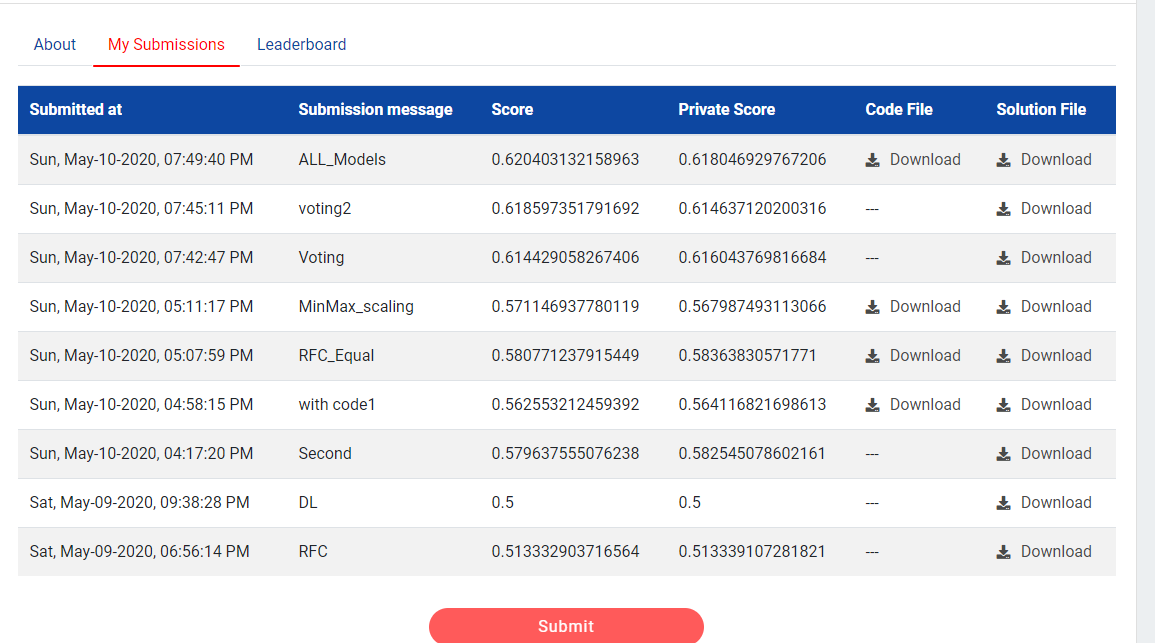

In [95]:
##All Submissions
Image(filename='G:\\DATASETS\\Analytics Vidya\\HR\\submissions.png')

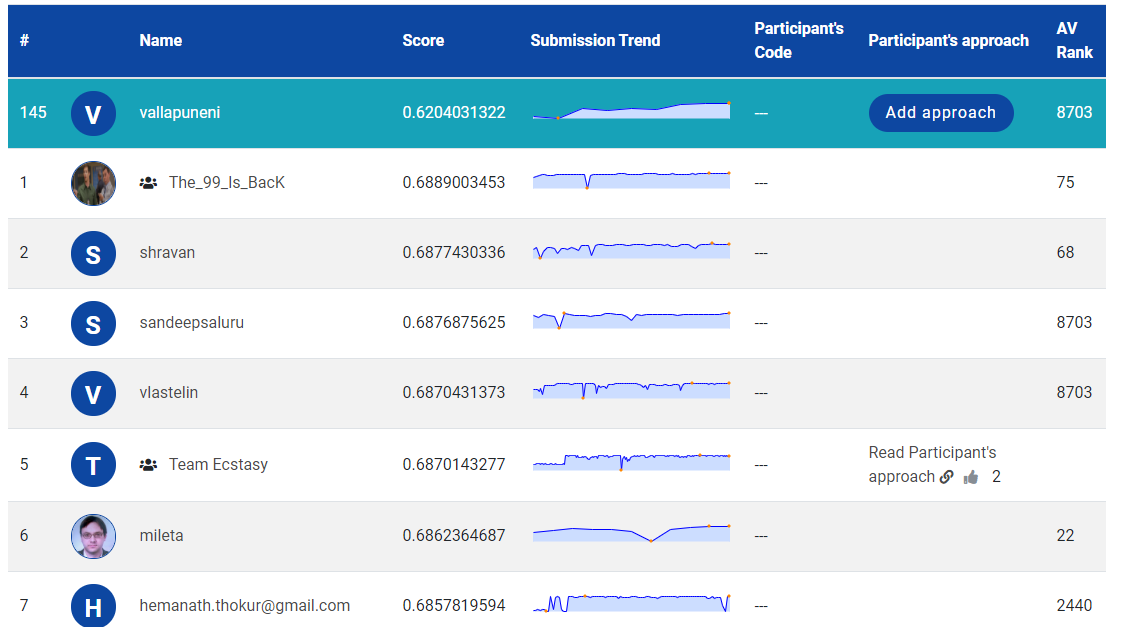

In [97]:
## Public Data Results
Image(filename='G:\\DATASETS\\Analytics Vidya\\HR\\results.png')

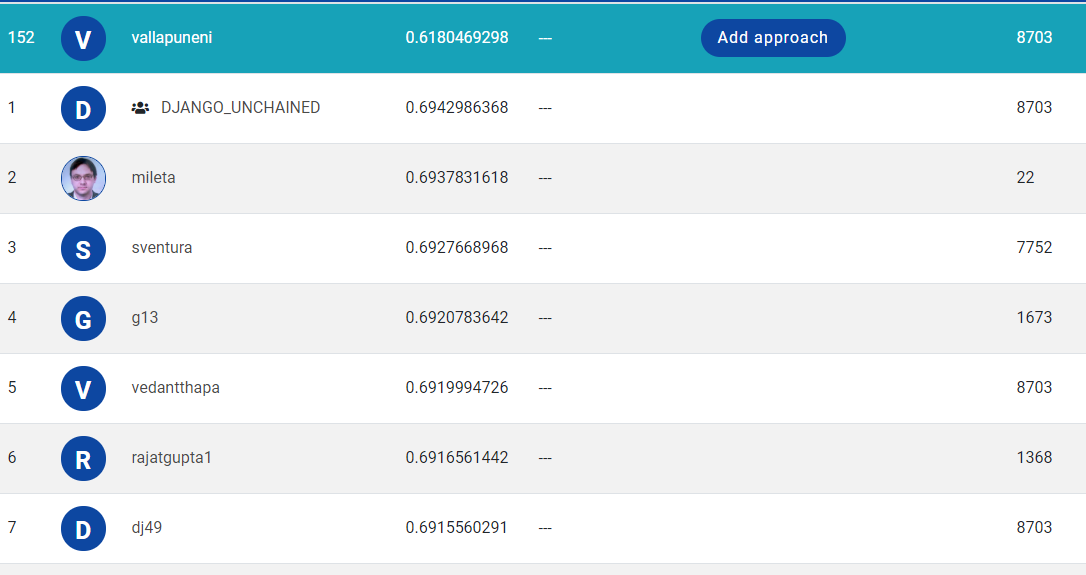

In [98]:
## Private Data Results
Image(filename='G:\\DATASETS\\Analytics Vidya\\HR\\results_.png')